In [337]:
import pandas as pd 
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [338]:
BDI3_df = pd.read_excel('../data/BDI3 All Evals for NSS 11-2023.xlsx') 

In [339]:
BDI3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23947 entries, 0 to 23946
Columns: 219 entries, Child ID to Code 10
dtypes: datetime64[ns](14), float64(79), object(126)
memory usage: 40.0+ MB


In [340]:
BDI3_df.columns

Index(['Child ID', 'Gender', 'Date of Birth', 'Location - Sub Level 1',
       'Program Label', 'Adaptive Sum of Scaled Scores',
       'Adaptive Developmental Quotient', 'Adaptive Percentile Rank',
       'Adaptive 95% Confidence Interval', 'Adaptive RDI',
       ...
       'Code 1', 'Code 2', 'Code 3', 'Code 4', 'Code 5', 'Code 6', 'Code 7',
       'Code 8', 'Code 9', 'Code 10'],
      dtype='object', length=219)

In [341]:
BDI3_df

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Code 1,Code 2,Code 3,Code 4,Code 5,Code 6,Code 7,Code 8,Code 9,Code 10
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,1990-09-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23942,SP03287,F,2023-09-25,Memphis Delta,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23943,SP03288,F,2021-05-18,South Central,BDI-3 Eligibility Evaluation,25.0,115.0,84,107-121,96/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23944,SP03289,F,2021-10-31,South Central,BDI-3 Eligibility Evaluation,21.0,103.0,58,96-110,92/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23945,SP03290,M,2020-03-25,Memphis Delta,BDI-3 Annual Evaluation,16.0,88.0,21,82-96,66/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
BDI3_df_new  = BDI3_df.drop(columns=['Code 1','Code 2','Code 3','Code 4','Code 5','Code 6','Code 7','Code 8','Code 9','Code 10'])

In [166]:
BDI3_df_new 

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,9.0,13.0,84,12,98/90,411.0,392 - 431,1,60.0,71
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,11.0,7.0,16,18,29/90,437.0,421 - 453,– 1.00,40.0,29
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,10.0,7.0,16,15,37/90,426.0,408 - 444,– 1.00,40.0,29
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,9.0,10.0,50,12,92/90,411.0,392 - 431,0,50.0,50
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,1990-09-01 00:00:00,...,10.0,10.0,50,15,88/90,426.0,408 - 444,0,50.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23942,SP03287,F,2023-09-25,Memphis Delta,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,6.0,15.0,95,6,>99/90,378.0,365 - 391,1.67,67.0,85
23943,SP03288,F,2021-05-18,South Central,BDI-3 Eligibility Evaluation,25.0,115.0,84,107-121,96/90,...,20.0,14.0,91,37,99/90,499.0,491 - 508,1.33,63.0,78
23944,SP03289,F,2021-10-31,South Central,BDI-3 Eligibility Evaluation,21.0,103.0,58,96-110,92/90,...,13.0,10.0,50,25,89/90,464.0,450 - 479,0,50.0,50
23945,SP03290,M,2020-03-25,Memphis Delta,BDI-3 Annual Evaluation,16.0,88.0,21,82-96,66/90,...,23.0,9.0,37,40,75/90,507.0,500 - 515,– 0.33,47.0,43


In [342]:
BDI3_df_new1 = BDI3_df_new.drop_duplicates()

In [343]:
BDI3_df_new1

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,9.0,13.0,84,12,98/90,411.0,392 - 431,1,60.0,71
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,11.0,7.0,16,18,29/90,437.0,421 - 453,– 1.00,40.0,29
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,10.0,7.0,16,15,37/90,426.0,408 - 444,– 1.00,40.0,29
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,9.0,10.0,50,12,92/90,411.0,392 - 431,0,50.0,50
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,1990-09-01 00:00:00,...,10.0,10.0,50,15,88/90,426.0,408 - 444,0,50.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23942,SP03287,F,2023-09-25,Memphis Delta,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,6.0,15.0,95,6,>99/90,378.0,365 - 391,1.67,67.0,85
23943,SP03288,F,2021-05-18,South Central,BDI-3 Eligibility Evaluation,25.0,115.0,84,107-121,96/90,...,20.0,14.0,91,37,99/90,499.0,491 - 508,1.33,63.0,78
23944,SP03289,F,2021-10-31,South Central,BDI-3 Eligibility Evaluation,21.0,103.0,58,96-110,92/90,...,13.0,10.0,50,25,89/90,464.0,450 - 479,0,50.0,50
23945,SP03290,M,2020-03-25,Memphis Delta,BDI-3 Annual Evaluation,16.0,88.0,21,82-96,66/90,...,23.0,9.0,37,40,75/90,507.0,500 - 515,– 0.33,47.0,43


In [234]:
BDI3_df_new2 =BDI3_df_new1.dropna()

In [236]:
df_filled2 = BDI3_df_new2.fillna(0)
df_filled2

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,11.0,7.0,16,18,29/90,437.0,421 - 453,– 1.00,40.0,29
5,54584,M,2020-06-05,Northwest,BDI-3 Eligibility Evaluation,17.0,91.0,27,85-99,79/90,...,12.0,6.0,9,22,19/90,451.0,429 - 473,– 1.33,37.0,22
6,54861,F,2020-07-21,Memphis Delta,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,71/90,...,18.0,11.0,63,34,95/90,491.0,481 - 502,0.33,53.0,57
8,55077,F,2020-11-23,First Tennessee,BDI-3 Eligibility Evaluation,7.0,61.0,1,56-70,21/90,...,12.0,7.0,16,22,39/90,451.0,429 - 473,– 1.00,40.0,29
11,55470,F,2021-05-15,Southwest,BDI-3 Eligibility Evaluation,19.0,97.0,42,90-104,85/90,...,14.0,11.0,63,28,95/90,471.0,459 - 484,0.33,53.0,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23939,SP03284,M,2021-09-30,First Tennessee,BDI-3 Eligibility Evaluation,7.0,61.0,1,56-70,27/90,...,10.0,6.0,9,15,1990-11-01 00:00:00,426.0,408 - 444,– 1.33,37.0,22
23941,SP03286,F,2021-08-16,Memphis Delta,BDI-3 Eligibility Evaluation,30.0,130.0,98,121-135,99/90,...,17.0,13.0,84,32,99/90,487.0,476 - 497,1,60.0,71
23943,SP03288,F,2021-05-18,South Central,BDI-3 Eligibility Evaluation,25.0,115.0,84,107-121,96/90,...,20.0,14.0,91,37,99/90,499.0,491 - 508,1.33,63.0,78
23944,SP03289,F,2021-10-31,South Central,BDI-3 Eligibility Evaluation,21.0,103.0,58,96-110,92/90,...,13.0,10.0,50,25,89/90,464.0,450 - 479,0,50.0,50


When reading the data in, you may notice that some of the values in the RDI columns are incorrectly converted to dates.
It is likely that this happens whenever the numerator of the fraction is 12 or less.

In [170]:
print(BDI3_df_new1.filter(like='RDI').columns)

Index(['Adaptive RDI', 'Social-Emotional RDI', 'Communication RDI',
       'Motor RDI', 'Cognitive RDI', 'Adaptive-Self Care RDI',
       'Adaptive-Personal Responsibility RDI',
       'Social Emotional-Adult Interaction RDI',
       'Social Emotional-Peer Interaction RDI',
       'Social Emotional-Self Concept / Social Role RDI',
       'Communication-Receptive Communication RDI',
       'Communication-Expressive Communication RDI', 'Motor-Gross Motor RDI',
       'Motor-Fine Motor RDI', 'Motor-Perceptual Motor RDI',
       'Cognitive-Attention and Memory RDI',
       'Cognitive-Reasoning / Academic Skills RDI',
       'Cognitive-Perception and Concepts RDI'],
      dtype='object')


In [171]:
RDI_df = BDI3_df_new1['Adaptive RDI'].astype(str)

In [172]:
RDI_df

0                      39/90
1                      79/90
2                      77/90
3                      99/90
4        1990-09-01 00:00:00
                ...         
23942                  99/90
23943                  96/90
23944                  92/90
23945                  66/90
23946                  94/90
Name: Adaptive RDI, Length: 19500, dtype: object

In [173]:
import datetime

def fix_rdi(x):
    if isinstance(x, datetime.date): 
        x_month= str(x.month)
        return x_month + '/90'
    else:
        return x


In [174]:
cleaned_x_list =BDI3_df_new1['Adaptive RDI']

BDI3_df_new1['Adaptive RDI'] = BDI3_df_new1['Adaptive RDI'].apply(fix_rdi)
print(BDI3_df_new1['Adaptive RDI'])


0        39/90
1        79/90
2        77/90
3        99/90
4         9/90
         ...  
23942    99/90
23943    96/90
23944    92/90
23945    66/90
23946    94/90
Name: Adaptive RDI, Length: 19500, dtype: object


C:\Users\Dell\AppData\Local\Temp\ipykernel_7432\3185056278.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BDI3_df_new1['Adaptive RDI'] = BDI3_df_new1['Adaptive RDI'].apply(fix_rdi)


In [175]:
BDI3_df_new1['Adaptive RDI']

0        39/90
1        79/90
2        77/90
3        99/90
4         9/90
         ...  
23942    99/90
23943    96/90
23944    92/90
23945    66/90
23946    94/90
Name: Adaptive RDI, Length: 19500, dtype: object

Is there a pattern of significant differences in children's scores in the sub-domains within a domain? 

For example, a gap between a child's expressive (talking) and receptive (understanding) language scores 
may indicate that additional evaluation is needed for that child's eligibility. 
A gap between these sub-domains for all or most children may indicate the BDI-3 tool may lack sensitivity in the language domain.



In [183]:
print(BDI3_df_new1['Program Label'].info())

<class 'pandas.core.series.Series'>
Index: 19500 entries, 0 to 23946
Series name: Program Label
Non-Null Count  Dtype 
--------------  ----- 
19500 non-null  object
dtypes: object(1)
memory usage: 304.7+ KB
None


checking null value of column Program Label

In [184]:
print(BDI3_df_new1['Program Label'].isnull().sum())

0


checking duplicate values

In [185]:
print(BDI3_df_new1['Program Label'].duplicated().sum())

19497


In [186]:
print(BDI3_df_new1['Program Label'].value_counts())

Program Label
BDI-3 Eligibility Evaluation          12392
BDI-3 Annual Evaluation                6905
BDI-3 Milestone or Exit Evaluation      203
Name: count, dtype: int64


In [211]:
print(BDI3_df_new1.filter(like='SS').columns)

Index(['Adaptive-Self Care SS', 'Adaptive-Self Care CSS',
       'Adaptive-Self Care CSS 90%', 'Adaptive-Personal Responsibility SS',
       'Adaptive-Personal Responsibility CSS',
       'Adaptive-Personal Responsibility CSS 90%',
       'Social Emotional-Adult Interaction SS',
       'Social Emotional-Adult Interaction CSS',
       'Social Emotional-Adult Interaction CSS 90%',
       'Social Emotional-Peer Interaction SS',
       'Social Emotional-Peer Interaction CSS',
       'Social Emotional-Peer Interaction CSS 90%',
       'Social Emotional-Self Concept / Social Role SS',
       'Social Emotional-Self Concept / Social Role CSS',
       'Social Emotional-Self Concept / Social Role CSS 90%',
       'Communication-Receptive Communication SS',
       'Communication-Receptive Communication CSS',
       'Communication-Receptive Communication CSS 90% ',
       'Communication-Expressive Communication SS',
       'Communication-Expressive Communication CSS',
       'Communication-Express

In [237]:
sub_domains = df_filled2[['Adaptive-Self Care SS',
        'Adaptive-Personal Responsibility SS',
        'Social Emotional-Adult Interaction SS',
       'Social Emotional-Peer Interaction SS',
        'Social Emotional-Self Concept / Social Role SS',
        'Communication-Receptive Communication SS',
        'Communication-Expressive Communication SS',
        'Motor-Fine Motor SS','Motor-Gross Motor SS',
       'Motor-Perceptual Motor SS',
       'Cognitive-Attention and Memory SS',
       'Cognitive-Reasoning / Academic Skills SS',
       'Cognitive-Perception and Concepts SS']]
       

In [238]:
SS_pattern =pd.DataFrame(sub_domains)
SS_pattern

,Adaptive-Self Care SS,Adaptive-Personal Responsibility SS,Social Emotional-Adult Interaction SS,Social Emotional-Peer Interaction SS,Social Emotional-Self Concept / Social Role SS,Communication-Receptive Communication SS,Communication-Expressive Communication SS,Motor-Fine Motor SS,Motor-Gross Motor SS,Motor-Perceptual Motor SS,Cognitive-Attention and Memory SS,Cognitive-Reasoning / Academic Skills SS,Cognitive-Perception and Concepts SS
1,7.0,9.0,12.0,9.0,11.0,10.0,9.0,13.0,7.0,11.0,9.0,14.0,7.0
5,11.0,6.0,10.0,10.0,9.0,9.0,7.0,10.0,11.0,9.0,9.0,11.0,6.0
6,6.0,10.0,10.0,9.0,8.0,8.0,8.0,18.0,10.0,15.0,11.0,9.0,11.0
8,6.0,1.0,10.0,8.0,9.0,7.0,4.0,11.0,8.0,10.0,7.0,8.0,7.0
11,9.0,10.0,11.0,12.0,10.0,11.0,1.0,13.0,11.0,13.0,9.0,7.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23939,6.0,1.0,11.0,5.0,5.0,5.0,4.0,9.0,7.0,4.0,6.0,9.0,6.0
23941,17.0,13.0,12.0,12.0,4.0,10.0,7.0,14.0,10.0,14.0,9.0,13.0,13.0
23943,10.0,15.0,12.0,13.0,13.0,14.0,10.0,11.0,15.0,12.0,13.0,14.0,14.0
23944,10.0,11.0,12.0,10.0,9.0,4.0,1.0,10.0,11.0,11.0,10.0,9.0,10.0


SS_pattern_cleaned =SS_pattern.dropna()

SS_pattern_cleaned

In [239]:
print(SS_pattern.describe())

       Adaptive-Self Care SS  Adaptive-Personal Responsibility SS  \
count            9241.000000                          9241.000000   
mean                6.812574                             7.996213   
std                 2.762406                             3.777079   
min                 1.000000                             1.000000   
25%                 5.000000                             5.000000   
50%                 7.000000                             8.000000   
75%                 8.000000                            11.000000   
max                19.000000                            19.000000   

       Social Emotional-Adult Interaction SS  \
count                            9241.000000   
mean                               10.460556   
std                                 2.655670   
min                                 1.000000   
25%                                 9.000000   
50%                                11.000000   
75%                                12.0000

In [240]:
f_value,p_value =stats.f_oneway(*[sub_domains[col]
for col in sub_domains.columns])
print(f"F-value:{f_value},p-value:{p_value}")






F-value:1770.1510445584138,p-value:0.0


In [ ]:
all code got it from RPubs by RStudio

In [252]:
 
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [259]:
data = sub_domains.melt(var_name='Sub-Domain',value_name='score')
tukey_results = pairwise_tukeyhsd(endog=data['score'],groups=data['Sub-Domain'],alpha=0.05)
print(tukey_results)

                                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                                      
                  group1                                      group2                     meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------------------------------------------------------------------
      Adaptive-Personal Responsibility SS                          Adaptive-Self Care SS  -1.1836    0.0  -1.339 -1.0283   True
      Adaptive-Personal Responsibility SS              Cognitive-Attention and Memory SS  -0.1565 0.0464 -0.3118 -0.0011   True
      Adaptive-Personal Responsibility SS           Cognitive-Perception and Concepts SS  -1.1796    0.0  -1.335 -1.0243   True
      Adaptive-Personal Responsibility SS       Cognitive-Reasoning / Academic Skills SS   0.1722  0.015  0.0168  0.3275   True
      Adaptive-Personal Responsibility SS      Communication-Expressive Communication SS  -2.7235    0.0

In [264]:
SS_data = pd.DataFrame(data=tukey_results._results_table.data[1:], columns = tukey_results._results_table.data[0])

In [277]:
import scipy.stats
statistic, pvalue = scipy.stats.shapiro(sub_domains)

print(statistic, pvalue)

0.9773852825164795 0.0


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [315]:
df_x = pd.melt(SS_pattern_cleaned,var_name= 'Sub_Domain',value_name='score')

In [316]:
df_x

,Sub_Domain,score
0,Adaptive-Self Care SS,7.0
1,Adaptive-Self Care SS,11.0
2,Adaptive-Self Care SS,6.0
3,Adaptive-Self Care SS,6.0
4,Adaptive-Self Care SS,9.0
...,...,...
125770,Cognitive-Perception and Concepts SS,6.0
125771,Cognitive-Perception and Concepts SS,13.0
125772,Cognitive-Perception and Concepts SS,14.0
125773,Cognitive-Perception and Concepts SS,10.0


In [317]:
tukey_results = pairwise_tukeyhsd(endog=data['score'],groups=data['Sub-Domain'],alpha=0.05)
print(tukey_results)

                                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                                      
                  group1                                      group2                     meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------------------------------------------------------------------
      Adaptive-Personal Responsibility SS                          Adaptive-Self Care SS  -1.1836    0.0  -1.339 -1.0283   True
      Adaptive-Personal Responsibility SS              Cognitive-Attention and Memory SS  -0.1565 0.0464 -0.3118 -0.0011   True
      Adaptive-Personal Responsibility SS           Cognitive-Perception and Concepts SS  -1.1796    0.0  -1.335 -1.0243   True
      Adaptive-Personal Responsibility SS       Cognitive-Reasoning / Academic Skills SS   0.1722  0.015  0.0168  0.3275   True
      Adaptive-Personal Responsibility SS      Communication-Expressive Communication SS  -2.7235    0.0

In [283]:
means=SS_pattern_cleaned.mean()

In [284]:
means.sort_values(inplace=True)

In [295]:
means=SS_pattern_cleaned.mean()
std_errors=SS_pattern_cleaned.sem()

In [333]:
test_colors = {
    'Adaptive-Personal Responsibility SS': 'red',
    'Adaptive-Self Care SS': 'red',
    'Cognitive-Attention and Memory SS': 'orange',
    'Cognitive-Perception and Concepts SS': 'orange',
    'Cognitive-Reasoning / Academic Skills SS': 'orange',
    'Communication-Expressive Communication SS': 'green',
    'Communication-Receptive Communication SS': 'green',
     'Motor-Fine Motor SS':'blue',
    'Motor-Gross Motor SS': 'blue',
    'Motor-Perceptual Motor SS': 'blue',
    'Social Emotional-Adult Interaction SS': 'purple',
    'Social Emotional-Peer Interaction SS': 'purple',
    'Social Emotional-Self Concept / Social Role SS': 'purple'}

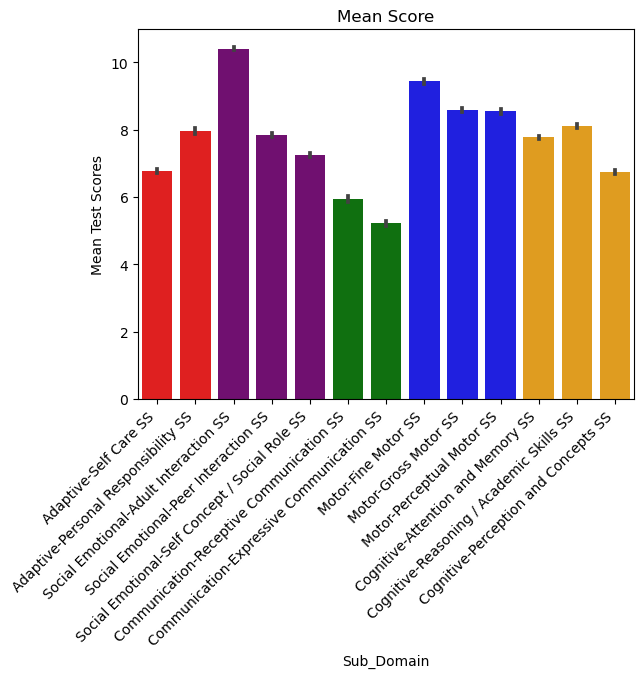

In [344]:
domain_subdomain = {'ADAPTIVE': ['Adaptive-Personal Responsibility SS','Adaptive-Self Care SS'],
    'COGNITIVE':['Cognitive-Attention and Memory SS','Cognitive-Perception and Concepts SS',
    'Cognitive-Reasoning / Academic Skills SS'],
    'COMMUNICATION':['Communication-Expressive Communication SS','Communication-Receptive Communication SS'],
    'MOTOR':['Motor-Gross Motor SS','Motor-Perceptual Motor SS'],
    'SOCIAL':['Social Emotional-Adult Interaction SS','Social Emotional-Peer Interaction SS',
    'Social Emotional-Self Concept / Social Role SS']}

5.Eligibility is currently based on domains. 
A child would be considered eligible based on a 40% delay in one area or 25% delay in two areas, 
as determined by Development Quotient (DQ) scores.
A DQ of 70 or less indicates a 40% delay, and a DQ between 71 and 78 indicates a 25% delay. 
If TEIS added an option for eligibility based on the total score on the BDI-3 total score (DQ score of 70 or less), 
are there any children who would have qualified that did not qualify based on the current method?



In [197]:
Quotient = BDI3_df_new1[['Adaptive Developmental Quotient',
       'Social-Emotional Developmental Quotient',
       'Communication Developmental Quotient', 'Motor Developmental Quotient',
       'Cognitive Developmental Quotient',
       'BDI-3 Total Developmental Quotient']]

In [198]:
Quotient =pd.DataFrame(Quotient)

In [199]:
Quotient

,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient,BDI-3 Total Developmental Quotient
0,85.0,127.0,91.0,88.0,100.0,99.0
1,88.0,104.0,97.0,102.0,100.0,99.0
2,90.0,91.0,82.0,109.0,83.0,89.0
3,115.0,103.0,88.0,91.0,113.0,101.0
4,75.0,73.0,70.0,73.0,97.0,71.0
...,...,...,...,...,...,...
23942,115.0,115.0,112.0,118.0,113.0,119.0
23943,115.0,116.0,112.0,117.0,122.0,119.0
23944,103.0,102.0,55.0,104.0,98.0,94.0
23945,88.0,90.0,76.0,100.0,88.0,88.0


In [200]:
missing_values = Quotient.isnull()
missing_values

,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient,BDI-3 Total Developmental Quotient
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
23942,False,False,False,False,False,False
23943,False,False,False,False,False,False
23944,False,False,False,False,False,False
23945,False,False,False,False,False,False


In [201]:
Quotient_clean=Quotient.dropna()

In [202]:
Quotient_clean

,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient,BDI-3 Total Developmental Quotient
0,85.0,127.0,91.0,88.0,100.0,99.0
1,88.0,104.0,97.0,102.0,100.0,99.0
2,90.0,91.0,82.0,109.0,83.0,89.0
3,115.0,103.0,88.0,91.0,113.0,101.0
4,75.0,73.0,70.0,73.0,97.0,71.0
...,...,...,...,...,...,...
23942,115.0,115.0,112.0,118.0,113.0,119.0
23943,115.0,116.0,112.0,117.0,122.0,119.0
23944,103.0,102.0,55.0,104.0,98.0,94.0
23945,88.0,90.0,76.0,100.0,88.0,88.0


In [207]:
Quotient_clean['Eligible based on Domains'] = (Quotient_clean[['Adaptive Developmental Quotient',
       'Social-Emotional Developmental Quotient',
       'Communication Developmental Quotient', 'Motor Developmental Quotient',
       'Cognitive Developmental Quotient']]<=70).any(axis=1)
(Quotient_clean[['Adaptive Developmental Quotient',
       'Social-Emotional Developmental Quotient',
       'Communication Developmental Quotient', 'Motor Developmental Quotient',
       'Cognitive Developmental Quotient']]<=78).any(axis=1)>=2
Quotient_clean['Eligible based on Total Domains'] = Quotient_clean['BDI-3 Total Developmental Quotient'] <=70




C:\Users\Dell\AppData\Local\Temp\ipykernel_7432\317146409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quotient_clean['Eligible based on Domains'] = (Quotient_clean[['Adaptive Developmental Quotient',
C:\Users\Dell\AppData\Local\Temp\ipykernel_7432\317146409.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quotient_clean['Eligible based on Total Domains'] = Quotient_clean['BDI-3 Total Developmental Quotient'] <=70


In [208]:
print( Quotient_clean[['Eligible based on Domains','Eligible based on Total Domains']])

       Eligible based on Domains  Eligible based on Total Domains
0                          False                            False
1                          False                            False
2                          False                            False
3                          False                            False
4                           True                            False
...                          ...                              ...
23942                      False                            False
23943                      False                            False
23944                       True                            False
23945                      False                            False
23946                      False                            False

[19443 rows x 2 columns]
